# <p style="text-align: justify;"><div class="alert alert-info" role="alert">Random Forest</div></p>

## `Ana González Guerra` 

### ` Student of the master in Data Science at the University of Cantabria` 

## Index<a class="anchor" id="index"></a>
* [Loading data](#1)
    * [Genetic predictors](#5)
    * [Target variables](#6)
        * [Maximum power relative to FFM1 in Wingate 1(W1MaxWRelFFM1)](#7)
        * [Mean power relative to FFM1 in Wingate 1 (W1MedWRelFFM1)](#8)
        * [Fatigue rate relative to FFM1 in Wingate 1 (W1DifWRelFFM1)](#9)
        * [Maximum power relative to FFM1 in Wingate 2(W2MaxWRelFFM1)](#10)
        * [Mean power relative to FFM1 in Wingate 2 (W2MedWRelFFM1)](#11)
        * [Fatigue rate relative to FFM1 in Wingate 2 (W2DifWRelFFM1)](#12)
        * [Maximum fatigue rate between Wingates relative to FFM1 (W1-W2MaxDifWRelFFM1)](#13)
        * [Mean fatigue rate between Wingates relative to FFM1 (W1-W2MedDifWRelFFM1)](#14)
        
* [Train/test partition](#2)
* [Random Forest application](#3)
    * [Cross-validation application and creation of Random Forest's binary classifier](#15)
        * [Maximum power relative to FFM1 in Wingate 1(W1MaxWRelFFM1)](#16)
        * [Mean power relative to FFM1 in Wingate 1 (W1MedWRelFFM1)](#17)
        * [Fatigue rate relative to FFM1 in Wingate 1 (W1DifWRelFFM1)](#18)
        * [Maximum power relative to FFM1 in Wingate 2(W2MaxWRelFFM1)](#19)
        * [Mean power relative to FFM1 in Wingate 2 (W2MedWRelFFM1)](#20)
        * [Fatigue rate relative to FFM1 in Wingate 2 (W2DifWRelFFM1)](#21)
        * [Maximum fatigue rate between Wingates relative to FFM1 (W1-W2MaxDifWRelFFM1)](#22)
        * [Mean fatigue rate between Wingates relative to FFM1 (W1-W2MedDifWRelFFM1)](#23)
* [Comparative](#4)
* [Best model](#24)


In this file we are going to apply Random Forest taking into account as target variables the power variables related to the FFM1 predictor.

## Loading data <a class="anchor" id="1"></a>

* [Returning to the index of contents](#index)

### Genetic predictors <a class="anchor" id="5"></a>

* [Returning to the index of contents](#index)

In [1]:
handle_genetic <- read.csv('handle_genetic_fusion_28_04_20.csv')

In [2]:
head(handle_genetic)

rs10034661,rs10063949,rs1024610,rs1024611,rs1042713,rs1045485,rs10491003,rs1049305,rs1049434,rs10497520,...,rs8111989,rs8192678,rs824205,rs833070,rs884736,rs921943,rs9469199,rs970547,rs9902453,rs9939609
G:G,C:T,A:T,T:T,A:A,C:G,G:G,C:G,A:T,C:T,...,C:T,A:G,G:G,A:G,C:T,A:G,A:G,A:A,A:G,A:A
G:G,C:T,A:T,C:T,A:G,G:G,G:G,G:G,A:A,C:C,...,C:T,A:G,A:G,A:G,C:T,A:G,G:G,A:G,A:G,T:T
G:G,T:T,A:T,T:T,A:G,G:G,G:G,C:G,A:A,C:C,...,C:T,A:G,G:G,A:G,C:T,A:A,G:G,A:G,A:G,A:A
G:G,T:T,T:T,C:T,A:G,G:G,G:G,C:C,A:T,C:C,...,C:T,A:G,G:G,A:G,C:T,A:G,G:G,A:A,A:A,A:A
G:G,C:T,T:T,C:T,G:G,C:C,G:G,C:G,T:T,C:C,...,C:T,A:G,G:G,G:G,T:T,G:G,G:G,A:A,A:G,A:T
G:G,C:T,T:T,C:T,A:G,G:G,G:G,C:G,A:T,C:C,...,C:T,A:G,G:G,G:G,C:T,A:G,G:G,A:G,G:G,T:T


### Target variables <a class="anchor" id="6"></a>

* [Returning to the index of contents](#index)

In [3]:
handle_target <- read.csv('handle_target_fusion_31_03_20.csv', row.name = 1)

In [4]:
head(handle_target)

,W1MaxWAbs,W1MaxWRel,W1maxRPM,W1MedWAbs,W1MedWRel,W1medRPM,W2MaxWAbs,W2MaxWRel,W2maxRPM,W2MedWAbs,...,W2DifWRelFFM1,W2DifWRelFFM2,W1.2MaxDifWAbs,W1.2MaxDifWRel,W1.2MaxDifWRelFFM1,W1.2MaxDifWRelFFM2,W1.2MedDifWAbs,W1.2MedDifWRel,W1.2MedDifWRelFFM1,W1.2MedDifWRelFFM2
0,398,8.747253,122,206,4.527473,100,397,8.725275,122,224,...,4.479981,4.544592,1,0.02197802,0.02589585,0.02626932,-18,-0.39560440,-0.46612522,-0.47284774
4,511,8.964912,128,294,5.157895,109,523,9.175439,122,295,...,4.552187,4.889881,-12,-0.21052632,-0.23958880,-0.25736216,-1,-0.01754386,-0.01996573,-0.02144685
7,524,10.174757,130,262,5.087379,107,476,9.242718,125,245,...,4.958966,5.566747,48,0.93203883,1.03043453,1.15672661,17,0.33009709,0.36494556,0.40967401
8,541,8.868852,128,351,5.754098,118,472,7.737705,130,333,...,2.792441,3.020719,69,1.13114754,1.38617564,1.49949379,18,0.29508197,0.36161104,0.39117229
9,547,9.596491,143,291,5.105263,116,169,2.964912,130,302,...,-3.215855,-3.248973,378,6.63157895,9.13979775,9.23392354,-11,-0.19298246,-0.26597295,-0.26871206
11,553,9.701754,133,365,6.403509,121,556,9.754386,136,355,...,4.113095,4.408965,-3,-0.05263158,-0.06138948,-0.06580544,10,0.17543860,0.20463161,0.21935148


In [5]:
names(handle_target)

[1] "W1MaxWAbs"          "W1MaxWRel"          "W1maxRPM"          
 [4] "W1MedWAbs"          "W1MedWRel"          "W1medRPM"          
 [7] "W2MaxWAbs"          "W2MaxWRel"          "W2maxRPM"          
[10] "W2MedWAbs"          "W2MedWRel"          "W2medRPM"          
[13] "W1MaxWRelFFM1"      "W1MaxWRelFFM2"      "W1MedWRelFFM1"     
[16] "W1MedWRelFFM2"      "W1DifWAbs"          "W1DifWRel"         
[19] "W1DifWRelFFM1"      "W1DifWRelFFM2"      "W2MaxWRelFFM1"     
[22] "W2MaxWRelFFM2"      "W2MedWRelFFM1"      "W2MedWRelFFM2"     
[25] "W2DifWAbs"          "W2DifWRel"          "W2DifWRelFFM1"     
[28] "W2DifWRelFFM2"      "W1.2MaxDifWAbs"     "W1.2MaxDifWRel"    
[31] "W1.2MaxDifWRelFFM1" "W1.2MaxDifWRelFFM2" "W1.2MedDifWAbs"    
[34] "W1.2MedDifWRel"     "W1.2MedDifWRelFFM1" "W1.2MedDifWRelFFM2"

#### Maximum power relative to FFM1 in Wingate 1(W1MaxWRelFFM1)<a class="anchor" id="7"></a>

* [Returning to the index of contents](#index)

In [6]:
w1_max <- cbind(handle_target['W1MaxWRelFFM1'],handle_genetic)

In [7]:
head(w1_max)

,W1MaxWRelFFM1,rs10034661,rs10063949,rs1024610,rs1024611,rs1042713,rs1045485,rs10491003,rs1049305,rs1049434,...,rs8111989,rs8192678,rs824205,rs833070,rs884736,rs921943,rs9469199,rs970547,rs9902453,rs9939609
0,10.30655,G:G,C:T,A:T,T:T,A:A,C:G,G:G,C:G,A:T,...,C:T,A:G,G:G,A:G,C:T,A:G,A:G,A:A,A:G,A:A
4,10.20249,G:G,C:T,A:T,C:T,A:G,G:G,G:G,G:G,A:A,...,C:T,A:G,A:G,A:G,C:T,A:G,G:G,A:G,A:G,T:T
7,11.24891,G:G,T:T,A:T,T:T,A:G,G:G,G:G,C:G,A:A,...,C:T,A:G,G:G,A:G,C:T,A:A,G:G,A:G,A:G,A:A
8,10.86842,G:G,T:T,T:T,C:T,A:G,G:G,G:G,C:C,A:T,...,C:T,A:G,G:G,A:G,C:T,A:G,G:G,A:A,A:A,A:A
9,13.22611,G:G,C:T,T:T,C:T,G:G,C:C,G:G,C:G,T:T,...,C:T,A:G,G:G,G:G,T:T,G:G,G:G,A:A,A:G,A:T
11,11.31613,G:G,C:T,T:T,C:T,A:G,G:G,G:G,C:G,A:T,...,C:T,A:G,G:G,G:G,C:T,A:G,G:G,A:G,G:G,T:T


In [8]:
rownames(w1_max) <- NULL 

In [9]:
W1MaxWRelFFM1Bin <- factor(as.numeric(handle_target['W1MaxWRelFFM1']>=median(handle_target$W1MaxWRelFFM1)))

In [10]:
w1_max <- cbind(W1MaxWRelFFM1Bin, w1_max)

In [11]:
head(w1_max)

W1MaxWRelFFM1Bin,W1MaxWRelFFM1,rs10034661,rs10063949,rs1024610,rs1024611,rs1042713,rs1045485,rs10491003,rs1049305,...,rs8111989,rs8192678,rs824205,rs833070,rs884736,rs921943,rs9469199,rs970547,rs9902453,rs9939609
0,10.30655,G:G,C:T,A:T,T:T,A:A,C:G,G:G,C:G,...,C:T,A:G,G:G,A:G,C:T,A:G,A:G,A:A,A:G,A:A
0,10.20249,G:G,C:T,A:T,C:T,A:G,G:G,G:G,G:G,...,C:T,A:G,A:G,A:G,C:T,A:G,G:G,A:G,A:G,T:T
0,11.24891,G:G,T:T,A:T,T:T,A:G,G:G,G:G,C:G,...,C:T,A:G,G:G,A:G,C:T,A:A,G:G,A:G,A:G,A:A
0,10.86842,G:G,T:T,T:T,C:T,A:G,G:G,G:G,C:C,...,C:T,A:G,G:G,A:G,C:T,A:G,G:G,A:A,A:A,A:A
0,13.22611,G:G,C:T,T:T,C:T,G:G,C:C,G:G,C:G,...,C:T,A:G,G:G,G:G,T:T,G:G,G:G,A:A,A:G,A:T
0,11.31613,G:G,C:T,T:T,C:T,A:G,G:G,G:G,C:G,...,C:T,A:G,G:G,G:G,C:T,A:G,G:G,A:G,G:G,T:T


We no longer need the original variable, in fact leaving it interferes with the algorithm because it considers it as a predictor. So we eliminate it. This will be done for each of the target variable cases.

In [12]:
w1_max$W1MaxWRelFFM1 <- NULL 

In [13]:
head(w1_max)

W1MaxWRelFFM1Bin,rs10034661,rs10063949,rs1024610,rs1024611,rs1042713,rs1045485,rs10491003,rs1049305,rs1049434,...,rs8111989,rs8192678,rs824205,rs833070,rs884736,rs921943,rs9469199,rs970547,rs9902453,rs9939609
0,G:G,C:T,A:T,T:T,A:A,C:G,G:G,C:G,A:T,...,C:T,A:G,G:G,A:G,C:T,A:G,A:G,A:A,A:G,A:A
0,G:G,C:T,A:T,C:T,A:G,G:G,G:G,G:G,A:A,...,C:T,A:G,A:G,A:G,C:T,A:G,G:G,A:G,A:G,T:T
0,G:G,T:T,A:T,T:T,A:G,G:G,G:G,C:G,A:A,...,C:T,A:G,G:G,A:G,C:T,A:A,G:G,A:G,A:G,A:A
0,G:G,T:T,T:T,C:T,A:G,G:G,G:G,C:C,A:T,...,C:T,A:G,G:G,A:G,C:T,A:G,G:G,A:A,A:A,A:A
0,G:G,C:T,T:T,C:T,G:G,C:C,G:G,C:G,T:T,...,C:T,A:G,G:G,G:G,T:T,G:G,G:G,A:A,A:G,A:T
0,G:G,C:T,T:T,C:T,A:G,G:G,G:G,C:G,A:T,...,C:T,A:G,G:G,G:G,C:T,A:G,G:G,A:G,G:G,T:T


#### Mean power relative to FFM1 in Wingate 1 (W1MedWRelFFM1) <a class="anchor" id="8"></a>

* [Returning to the index of contents](#index)

In [15]:
w1_med <- cbind(handle_target['W1MedWRelFFM1'],handle_genetic) 

rownames(w1_med) <- NULL

head(w1_med)


W1MedWRelFFM1,rs10034661,rs10063949,rs1024610,rs1024611,rs1042713,rs1045485,rs10491003,rs1049305,rs1049434,...,rs8111989,rs8192678,rs824205,rs833070,rs884736,rs921943,rs9469199,rs970547,rs9902453,rs9939609
5.334544,G:G,C:T,A:T,T:T,A:A,C:G,G:G,C:G,A:T,...,C:T,A:G,G:G,A:G,C:T,A:G,A:G,A:A,A:G,A:A
5.869926,G:G,C:T,A:T,C:T,A:G,G:G,G:G,G:G,A:A,...,C:T,A:G,A:G,A:G,C:T,A:G,G:G,A:G,A:G,T:T
5.624455,G:G,T:T,A:T,T:T,A:G,G:G,G:G,C:G,A:A,...,C:T,A:G,G:G,A:G,C:T,A:A,G:G,A:G,A:G,A:A
7.051415,G:G,T:T,T:T,C:T,A:G,G:G,G:G,C:C,A:T,...,C:T,A:G,G:G,A:G,C:T,A:G,G:G,A:A,A:A,A:A
7.036194,G:G,C:T,T:T,C:T,G:G,C:C,G:G,C:G,T:T,...,C:T,A:G,G:G,G:G,T:T,G:G,G:G,A:A,A:G,A:T
7.469054,G:G,C:T,T:T,C:T,A:G,G:G,G:G,C:G,A:T,...,C:T,A:G,G:G,G:G,C:T,A:G,G:G,A:G,G:G,T:T


In [16]:
W1MedWRelFFM1Bin <- factor(as.numeric(handle_target['W1MedWRelFFM1']>=median(handle_target$W1MedWRelFFM1)))

w1_med <- cbind(W1MedWRelFFM1Bin, w1_med)

head(w1_med)

W1MedWRelFFM1Bin,W1MedWRelFFM1,rs10034661,rs10063949,rs1024610,rs1024611,rs1042713,rs1045485,rs10491003,rs1049305,...,rs8111989,rs8192678,rs824205,rs833070,rs884736,rs921943,rs9469199,rs970547,rs9902453,rs9939609
0,5.334544,G:G,C:T,A:T,T:T,A:A,C:G,G:G,C:G,...,C:T,A:G,G:G,A:G,C:T,A:G,A:G,A:A,A:G,A:A
0,5.869926,G:G,C:T,A:T,C:T,A:G,G:G,G:G,G:G,...,C:T,A:G,A:G,A:G,C:T,A:G,G:G,A:G,A:G,T:T
0,5.624455,G:G,T:T,A:T,T:T,A:G,G:G,G:G,C:G,...,C:T,A:G,G:G,A:G,C:T,A:A,G:G,A:G,A:G,A:A
0,7.051415,G:G,T:T,T:T,C:T,A:G,G:G,G:G,C:C,...,C:T,A:G,G:G,A:G,C:T,A:G,G:G,A:A,A:A,A:A
0,7.036194,G:G,C:T,T:T,C:T,G:G,C:C,G:G,C:G,...,C:T,A:G,G:G,G:G,T:T,G:G,G:G,A:A,A:G,A:T
0,7.469054,G:G,C:T,T:T,C:T,A:G,G:G,G:G,C:G,...,C:T,A:G,G:G,G:G,C:T,A:G,G:G,A:G,G:G,T:T


In [17]:
w1_med$W1MedWRelFFM1 <- NULL
head(w1_med)

W1MedWRelFFM1Bin,rs10034661,rs10063949,rs1024610,rs1024611,rs1042713,rs1045485,rs10491003,rs1049305,rs1049434,...,rs8111989,rs8192678,rs824205,rs833070,rs884736,rs921943,rs9469199,rs970547,rs9902453,rs9939609
0,G:G,C:T,A:T,T:T,A:A,C:G,G:G,C:G,A:T,...,C:T,A:G,G:G,A:G,C:T,A:G,A:G,A:A,A:G,A:A
0,G:G,C:T,A:T,C:T,A:G,G:G,G:G,G:G,A:A,...,C:T,A:G,A:G,A:G,C:T,A:G,G:G,A:G,A:G,T:T
0,G:G,T:T,A:T,T:T,A:G,G:G,G:G,C:G,A:A,...,C:T,A:G,G:G,A:G,C:T,A:A,G:G,A:G,A:G,A:A
0,G:G,T:T,T:T,C:T,A:G,G:G,G:G,C:C,A:T,...,C:T,A:G,G:G,A:G,C:T,A:G,G:G,A:A,A:A,A:A
0,G:G,C:T,T:T,C:T,G:G,C:C,G:G,C:G,T:T,...,C:T,A:G,G:G,G:G,T:T,G:G,G:G,A:A,A:G,A:T
0,G:G,C:T,T:T,C:T,A:G,G:G,G:G,C:G,A:T,...,C:T,A:G,G:G,G:G,C:T,A:G,G:G,A:G,G:G,T:T


#### Fatigue rate relative to FFM1 in Wingate 1 (W1DifWRelFFM1) <a class="anchor" id="9"></a>

* [Returning to the index of contents](#index)

In [19]:
ind_w1 <- cbind(handle_target['W1DifWRelFFM1'],handle_genetic) 

rownames(ind_w1) <- NULL

head(ind_w1)

W1DifWRelFFM1,rs10034661,rs10063949,rs1024610,rs1024611,rs1042713,rs1045485,rs10491003,rs1049305,rs1049434,...,rs8111989,rs8192678,rs824205,rs833070,rs884736,rs921943,rs9469199,rs970547,rs9902453,rs9939609
4.972002,G:G,C:T,A:T,T:T,A:A,C:G,G:G,C:G,A:T,...,C:T,A:G,G:G,A:G,C:T,A:G,A:G,A:A,A:G,A:A
4.332564,G:G,C:T,A:T,C:T,A:G,G:G,G:G,G:G,A:A,...,C:T,A:G,A:G,A:G,C:T,A:G,G:G,A:G,A:G,T:T
5.624455,G:G,T:T,A:T,T:T,A:G,G:G,G:G,C:G,A:A,...,C:T,A:G,G:G,A:G,C:T,A:A,G:G,A:G,A:G,A:A
3.817005,G:G,T:T,T:T,C:T,A:G,G:G,G:G,C:C,A:T,...,C:T,A:G,G:G,A:G,C:T,A:G,G:G,A:A,A:A,A:A
6.189916,G:G,C:T,T:T,C:T,G:G,C:C,G:G,C:G,T:T,...,C:T,A:G,G:G,G:G,T:T,G:G,G:G,A:A,A:G,A:T
3.847074,G:G,C:T,T:T,C:T,A:G,G:G,G:G,C:G,A:T,...,C:T,A:G,G:G,G:G,C:T,A:G,G:G,A:G,G:G,T:T


In [20]:
W1DifWRelFFM1Bin <- factor(as.numeric(handle_target['W1DifWRelFFM1']>=median(handle_target$W1DifWRelFFM1)))

ind_w1<- cbind(W1DifWRelFFM1Bin, ind_w1)

head(ind_w1)

W1DifWRelFFM1Bin,W1DifWRelFFM1,rs10034661,rs10063949,rs1024610,rs1024611,rs1042713,rs1045485,rs10491003,rs1049305,...,rs8111989,rs8192678,rs824205,rs833070,rs884736,rs921943,rs9469199,rs970547,rs9902453,rs9939609
0,4.972002,G:G,C:T,A:T,T:T,A:A,C:G,G:G,C:G,...,C:T,A:G,G:G,A:G,C:T,A:G,A:G,A:A,A:G,A:A
0,4.332564,G:G,C:T,A:T,C:T,A:G,G:G,G:G,G:G,...,C:T,A:G,A:G,A:G,C:T,A:G,G:G,A:G,A:G,T:T
0,5.624455,G:G,T:T,A:T,T:T,A:G,G:G,G:G,C:G,...,C:T,A:G,G:G,A:G,C:T,A:A,G:G,A:G,A:G,A:A
0,3.817005,G:G,T:T,T:T,C:T,A:G,G:G,G:G,C:C,...,C:T,A:G,G:G,A:G,C:T,A:G,G:G,A:A,A:A,A:A
1,6.189916,G:G,C:T,T:T,C:T,G:G,C:C,G:G,C:G,...,C:T,A:G,G:G,G:G,T:T,G:G,G:G,A:A,A:G,A:T
0,3.847074,G:G,C:T,T:T,C:T,A:G,G:G,G:G,C:G,...,C:T,A:G,G:G,G:G,C:T,A:G,G:G,A:G,G:G,T:T


In [21]:
ind_w1$W1DifWRelFFM1 <- NULL
head(ind_w1)

W1DifWRelFFM1Bin,rs10034661,rs10063949,rs1024610,rs1024611,rs1042713,rs1045485,rs10491003,rs1049305,rs1049434,...,rs8111989,rs8192678,rs824205,rs833070,rs884736,rs921943,rs9469199,rs970547,rs9902453,rs9939609
0,G:G,C:T,A:T,T:T,A:A,C:G,G:G,C:G,A:T,...,C:T,A:G,G:G,A:G,C:T,A:G,A:G,A:A,A:G,A:A
0,G:G,C:T,A:T,C:T,A:G,G:G,G:G,G:G,A:A,...,C:T,A:G,A:G,A:G,C:T,A:G,G:G,A:G,A:G,T:T
0,G:G,T:T,A:T,T:T,A:G,G:G,G:G,C:G,A:A,...,C:T,A:G,G:G,A:G,C:T,A:A,G:G,A:G,A:G,A:A
0,G:G,T:T,T:T,C:T,A:G,G:G,G:G,C:C,A:T,...,C:T,A:G,G:G,A:G,C:T,A:G,G:G,A:A,A:A,A:A
1,G:G,C:T,T:T,C:T,G:G,C:C,G:G,C:G,T:T,...,C:T,A:G,G:G,G:G,T:T,G:G,G:G,A:A,A:G,A:T
0,G:G,C:T,T:T,C:T,A:G,G:G,G:G,C:G,A:T,...,C:T,A:G,G:G,G:G,C:T,A:G,G:G,A:G,G:G,T:T


#### Maximum power relative to FFM1 in Wingate 2 (W2MaxWRelFFM1) <a class="anchor" id="10"></a>

* [Returning to the index of contents](#index)

In [23]:
w2_max <- cbind(handle_target['W2MaxWRelFFM1'],handle_genetic)

rownames(w2_max) <- NULL

head(w2_max)

W2MaxWRelFFM1,rs10034661,rs10063949,rs1024610,rs1024611,rs1042713,rs1045485,rs10491003,rs1049305,rs1049434,...,rs8111989,rs8192678,rs824205,rs833070,rs884736,rs921943,rs9469199,rs970547,rs9902453,rs9939609
10.280651,G:G,C:T,A:T,T:T,A:A,C:G,G:G,C:G,A:T,...,C:T,A:G,G:G,A:G,C:T,A:G,A:G,A:A,A:G,A:A
10.442079,G:G,C:T,A:T,C:T,A:G,G:G,G:G,G:G,A:A,...,C:T,A:G,A:G,A:G,C:T,A:G,G:G,A:G,A:G,T:T
10.218476,G:G,T:T,A:T,T:T,A:G,G:G,G:G,C:G,A:A,...,C:T,A:G,G:G,A:G,C:T,A:A,G:G,A:G,A:G,A:A
9.482245,G:G,T:T,T:T,C:T,A:G,G:G,G:G,C:C,A:T,...,C:T,A:G,G:G,A:G,C:T,A:G,G:G,A:A,A:A,A:A
4.086312,G:G,C:T,T:T,C:T,G:G,C:C,G:G,C:G,T:T,...,C:T,A:G,G:G,G:G,T:T,G:G,G:G,A:A,A:G,A:T
11.377517,G:G,C:T,T:T,C:T,A:G,G:G,G:G,C:G,A:T,...,C:T,A:G,G:G,G:G,C:T,A:G,G:G,A:G,G:G,T:T


In [24]:
W2MaxWRelFFM1Bin <- factor(as.numeric(handle_target['W2MaxWRelFFM1']>=median(handle_target$W2MaxWRelFFM1)))

w2_max <- cbind(W2MaxWRelFFM1Bin, w2_max)

head(w2_max)

W2MaxWRelFFM1Bin,W2MaxWRelFFM1,rs10034661,rs10063949,rs1024610,rs1024611,rs1042713,rs1045485,rs10491003,rs1049305,...,rs8111989,rs8192678,rs824205,rs833070,rs884736,rs921943,rs9469199,rs970547,rs9902453,rs9939609
0,10.280651,G:G,C:T,A:T,T:T,A:A,C:G,G:G,C:G,...,C:T,A:G,G:G,A:G,C:T,A:G,A:G,A:A,A:G,A:A
0,10.442079,G:G,C:T,A:T,C:T,A:G,G:G,G:G,G:G,...,C:T,A:G,A:G,A:G,C:T,A:G,G:G,A:G,A:G,T:T
0,10.218476,G:G,T:T,A:T,T:T,A:G,G:G,G:G,C:G,...,C:T,A:G,G:G,A:G,C:T,A:A,G:G,A:G,A:G,A:A
0,9.482245,G:G,T:T,T:T,C:T,A:G,G:G,G:G,C:C,...,C:T,A:G,G:G,A:G,C:T,A:G,G:G,A:A,A:A,A:A
0,4.086312,G:G,C:T,T:T,C:T,G:G,C:C,G:G,C:G,...,C:T,A:G,G:G,G:G,T:T,G:G,G:G,A:A,A:G,A:T
0,11.377517,G:G,C:T,T:T,C:T,A:G,G:G,G:G,C:G,...,C:T,A:G,G:G,G:G,C:T,A:G,G:G,A:G,G:G,T:T


In [25]:
w2_max$W2MaxWRelFFM1 <- NULL
head(w2_max)

W2MaxWRelFFM1Bin,rs10034661,rs10063949,rs1024610,rs1024611,rs1042713,rs1045485,rs10491003,rs1049305,rs1049434,...,rs8111989,rs8192678,rs824205,rs833070,rs884736,rs921943,rs9469199,rs970547,rs9902453,rs9939609
0,G:G,C:T,A:T,T:T,A:A,C:G,G:G,C:G,A:T,...,C:T,A:G,G:G,A:G,C:T,A:G,A:G,A:A,A:G,A:A
0,G:G,C:T,A:T,C:T,A:G,G:G,G:G,G:G,A:A,...,C:T,A:G,A:G,A:G,C:T,A:G,G:G,A:G,A:G,T:T
0,G:G,T:T,A:T,T:T,A:G,G:G,G:G,C:G,A:A,...,C:T,A:G,G:G,A:G,C:T,A:A,G:G,A:G,A:G,A:A
0,G:G,T:T,T:T,C:T,A:G,G:G,G:G,C:C,A:T,...,C:T,A:G,G:G,A:G,C:T,A:G,G:G,A:A,A:A,A:A
0,G:G,C:T,T:T,C:T,G:G,C:C,G:G,C:G,T:T,...,C:T,A:G,G:G,G:G,T:T,G:G,G:G,A:A,A:G,A:T
0,G:G,C:T,T:T,C:T,A:G,G:G,G:G,C:G,A:T,...,C:T,A:G,G:G,G:G,C:T,A:G,G:G,A:G,G:G,T:T


#### Mean power relative to FFM1 in Wingate 2 (W2MedWRelFFM1) <a class="anchor" id="11"></a>

* [Returning to the index of contents](#index)

In [26]:
w2_med <- cbind(handle_target['W2MedWRelFFM1'],handle_genetic)

rownames(w2_med) <- NULL

head(w2_med)

W2MedWRelFFM1,rs10034661,rs10063949,rs1024610,rs1024611,rs1042713,rs1045485,rs10491003,rs1049305,rs1049434,...,rs8111989,rs8192678,rs824205,rs833070,rs884736,rs921943,rs9469199,rs970547,rs9902453,rs9939609
5.800669,G:G,C:T,A:T,T:T,A:A,C:G,G:G,C:G,A:T,...,C:T,A:G,G:G,A:G,C:T,A:G,A:G,A:A,A:G,A:A
5.889891,G:G,C:T,A:T,C:T,A:G,G:G,G:G,G:G,A:A,...,C:T,A:G,A:G,A:G,C:T,A:G,G:G,A:G,A:G,T:T
5.259510,G:G,T:T,A:T,T:T,A:G,G:G,G:G,C:G,A:A,...,C:T,A:G,G:G,A:G,C:T,A:A,G:G,A:G,A:G,A:A
6.689804,G:G,T:T,T:T,C:T,A:G,G:G,G:G,C:C,A:T,...,C:T,A:G,G:G,A:G,C:T,A:G,G:G,A:A,A:A,A:A
7.302166,G:G,C:T,T:T,C:T,G:G,C:C,G:G,C:G,T:T,...,C:T,A:G,G:G,G:G,T:T,G:G,G:G,A:A,A:G,A:T
7.264422,G:G,C:T,T:T,C:T,A:G,G:G,G:G,C:G,A:T,...,C:T,A:G,G:G,G:G,C:T,A:G,G:G,A:G,G:G,T:T


In [27]:
W2MedWRelFFM1Bin <- factor(as.numeric(handle_target['W2MedWRelFFM1']>=median(handle_target$W2MedWRelFFM1)))

w2_med <- cbind(W2MedWRelFFM1Bin, w2_med)

head(w2_med)

W2MedWRelFFM1Bin,W2MedWRelFFM1,rs10034661,rs10063949,rs1024610,rs1024611,rs1042713,rs1045485,rs10491003,rs1049305,...,rs8111989,rs8192678,rs824205,rs833070,rs884736,rs921943,rs9469199,rs970547,rs9902453,rs9939609
0,5.800669,G:G,C:T,A:T,T:T,A:A,C:G,G:G,C:G,...,C:T,A:G,G:G,A:G,C:T,A:G,A:G,A:A,A:G,A:A
0,5.889891,G:G,C:T,A:T,C:T,A:G,G:G,G:G,G:G,...,C:T,A:G,A:G,A:G,C:T,A:G,G:G,A:G,A:G,T:T
0,5.259510,G:G,T:T,A:T,T:T,A:G,G:G,G:G,C:G,...,C:T,A:G,G:G,A:G,C:T,A:A,G:G,A:G,A:G,A:A
0,6.689804,G:G,T:T,T:T,C:T,A:G,G:G,G:G,C:C,...,C:T,A:G,G:G,A:G,C:T,A:G,G:G,A:A,A:A,A:A
0,7.302166,G:G,C:T,T:T,C:T,G:G,C:C,G:G,C:G,...,C:T,A:G,G:G,G:G,T:T,G:G,G:G,A:A,A:G,A:T
0,7.264422,G:G,C:T,T:T,C:T,A:G,G:G,G:G,C:G,...,C:T,A:G,G:G,G:G,C:T,A:G,G:G,A:G,G:G,T:T


In [28]:
w2_med$W2MedWRelFFM1 <- NULL
head(w2_med)

W2MedWRelFFM1Bin,rs10034661,rs10063949,rs1024610,rs1024611,rs1042713,rs1045485,rs10491003,rs1049305,rs1049434,...,rs8111989,rs8192678,rs824205,rs833070,rs884736,rs921943,rs9469199,rs970547,rs9902453,rs9939609
0,G:G,C:T,A:T,T:T,A:A,C:G,G:G,C:G,A:T,...,C:T,A:G,G:G,A:G,C:T,A:G,A:G,A:A,A:G,A:A
0,G:G,C:T,A:T,C:T,A:G,G:G,G:G,G:G,A:A,...,C:T,A:G,A:G,A:G,C:T,A:G,G:G,A:G,A:G,T:T
0,G:G,T:T,A:T,T:T,A:G,G:G,G:G,C:G,A:A,...,C:T,A:G,G:G,A:G,C:T,A:A,G:G,A:G,A:G,A:A
0,G:G,T:T,T:T,C:T,A:G,G:G,G:G,C:C,A:T,...,C:T,A:G,G:G,A:G,C:T,A:G,G:G,A:A,A:A,A:A
0,G:G,C:T,T:T,C:T,G:G,C:C,G:G,C:G,T:T,...,C:T,A:G,G:G,G:G,T:T,G:G,G:G,A:A,A:G,A:T
0,G:G,C:T,T:T,C:T,A:G,G:G,G:G,C:G,A:T,...,C:T,A:G,G:G,G:G,C:T,A:G,G:G,A:G,G:G,T:T


#### Fatigue rate relative to FFM1 in Wingate 2 (W2DifWRelFFM1) <a class="anchor" id="12"></a>

* [Returning to the index of contents](#index)

In [29]:
ind_w2 <- cbind(handle_target['W2DifWRelFFM1'],handle_genetic) 

rownames(ind_w2) <- NULL

head(ind_w2)

W2DifWRelFFM1,rs10034661,rs10063949,rs1024610,rs1024611,rs1042713,rs1045485,rs10491003,rs1049305,rs1049434,...,rs8111989,rs8192678,rs824205,rs833070,rs884736,rs921943,rs9469199,rs970547,rs9902453,rs9939609
4.479981,G:G,C:T,A:T,T:T,A:A,C:G,G:G,C:G,A:T,...,C:T,A:G,G:G,A:G,C:T,A:G,A:G,A:A,A:G,A:A
4.552187,G:G,C:T,A:T,C:T,A:G,G:G,G:G,G:G,A:A,...,C:T,A:G,A:G,A:G,C:T,A:G,G:G,A:G,A:G,T:T
4.958966,G:G,T:T,A:T,T:T,A:G,G:G,G:G,C:G,A:A,...,C:T,A:G,G:G,A:G,C:T,A:A,G:G,A:G,A:G,A:A
2.792441,G:G,T:T,T:T,C:T,A:G,G:G,G:G,C:C,A:T,...,C:T,A:G,G:G,A:G,C:T,A:G,G:G,A:A,A:A,A:A
-3.215855,G:G,C:T,T:T,C:T,G:G,C:C,G:G,C:G,T:T,...,C:T,A:G,G:G,G:G,T:T,G:G,G:G,A:A,A:G,A:T
4.113095,G:G,C:T,T:T,C:T,A:G,G:G,G:G,C:G,A:T,...,C:T,A:G,G:G,G:G,C:T,A:G,G:G,A:G,G:G,T:T


In [30]:
W2DifWRelFFM1Bin <- factor(as.numeric(handle_target['W2DifWRelFFM1']>=median(handle_target$W2DifWRelFFM1)))

ind_w2<- cbind(W2DifWRelFFM1Bin, ind_w2)

head(ind_w2)

W2DifWRelFFM1Bin,W2DifWRelFFM1,rs10034661,rs10063949,rs1024610,rs1024611,rs1042713,rs1045485,rs10491003,rs1049305,...,rs8111989,rs8192678,rs824205,rs833070,rs884736,rs921943,rs9469199,rs970547,rs9902453,rs9939609
0,4.479981,G:G,C:T,A:T,T:T,A:A,C:G,G:G,C:G,...,C:T,A:G,G:G,A:G,C:T,A:G,A:G,A:A,A:G,A:A
0,4.552187,G:G,C:T,A:T,C:T,A:G,G:G,G:G,G:G,...,C:T,A:G,A:G,A:G,C:T,A:G,G:G,A:G,A:G,T:T
0,4.958966,G:G,T:T,A:T,T:T,A:G,G:G,G:G,C:G,...,C:T,A:G,G:G,A:G,C:T,A:A,G:G,A:G,A:G,A:A
0,2.792441,G:G,T:T,T:T,C:T,A:G,G:G,G:G,C:C,...,C:T,A:G,G:G,A:G,C:T,A:G,G:G,A:A,A:A,A:A
0,-3.215855,G:G,C:T,T:T,C:T,G:G,C:C,G:G,C:G,...,C:T,A:G,G:G,G:G,T:T,G:G,G:G,A:A,A:G,A:T
0,4.113095,G:G,C:T,T:T,C:T,A:G,G:G,G:G,C:G,...,C:T,A:G,G:G,G:G,C:T,A:G,G:G,A:G,G:G,T:T


In [31]:
ind_w2$W2DifWRelFFM1 <- NULL
head(ind_w2)

W2DifWRelFFM1Bin,rs10034661,rs10063949,rs1024610,rs1024611,rs1042713,rs1045485,rs10491003,rs1049305,rs1049434,...,rs8111989,rs8192678,rs824205,rs833070,rs884736,rs921943,rs9469199,rs970547,rs9902453,rs9939609
0,G:G,C:T,A:T,T:T,A:A,C:G,G:G,C:G,A:T,...,C:T,A:G,G:G,A:G,C:T,A:G,A:G,A:A,A:G,A:A
0,G:G,C:T,A:T,C:T,A:G,G:G,G:G,G:G,A:A,...,C:T,A:G,A:G,A:G,C:T,A:G,G:G,A:G,A:G,T:T
0,G:G,T:T,A:T,T:T,A:G,G:G,G:G,C:G,A:A,...,C:T,A:G,G:G,A:G,C:T,A:A,G:G,A:G,A:G,A:A
0,G:G,T:T,T:T,C:T,A:G,G:G,G:G,C:C,A:T,...,C:T,A:G,G:G,A:G,C:T,A:G,G:G,A:A,A:A,A:A
0,G:G,C:T,T:T,C:T,G:G,C:C,G:G,C:G,T:T,...,C:T,A:G,G:G,G:G,T:T,G:G,G:G,A:A,A:G,A:T
0,G:G,C:T,T:T,C:T,A:G,G:G,G:G,C:G,A:T,...,C:T,A:G,G:G,G:G,C:T,A:G,G:G,A:G,G:G,T:T


#### Maximum fatigue rate between Wingates relative to FFM1 (W1-W2MaxDifWRelFFM1) <a class="anchor" id="13"></a>

* [Returning to the index of contents](#index)

In [32]:
ind_max <- cbind(handle_target['W1.2MaxDifWRelFFM1'],handle_genetic)

rownames(ind_max) <- NULL

head(ind_max)

W1.2MaxDifWRelFFM1,rs10034661,rs10063949,rs1024610,rs1024611,rs1042713,rs1045485,rs10491003,rs1049305,rs1049434,...,rs8111989,rs8192678,rs824205,rs833070,rs884736,rs921943,rs9469199,rs970547,rs9902453,rs9939609
0.02589585,G:G,C:T,A:T,T:T,A:A,C:G,G:G,C:G,A:T,...,C:T,A:G,G:G,A:G,C:T,A:G,A:G,A:A,A:G,A:A
-0.23958880,G:G,C:T,A:T,C:T,A:G,G:G,G:G,G:G,A:A,...,C:T,A:G,A:G,A:G,C:T,A:G,G:G,A:G,A:G,T:T
1.03043453,G:G,T:T,A:T,T:T,A:G,G:G,G:G,C:G,A:A,...,C:T,A:G,G:G,A:G,C:T,A:A,G:G,A:G,A:G,A:A
1.38617564,G:G,T:T,T:T,C:T,A:G,G:G,G:G,C:C,A:T,...,C:T,A:G,G:G,A:G,C:T,A:G,G:G,A:A,A:A,A:A
9.13979775,G:G,C:T,T:T,C:T,G:G,C:C,G:G,C:G,T:T,...,C:T,A:G,G:G,G:G,T:T,G:G,G:G,A:A,A:G,A:T
-0.06138948,G:G,C:T,T:T,C:T,A:G,G:G,G:G,C:G,A:T,...,C:T,A:G,G:G,G:G,C:T,A:G,G:G,A:G,G:G,T:T


In [33]:
W1.2MaxDifWRelFFM1Bin <- factor(as.numeric(handle_target['W1.2MaxDifWRelFFM1']>=median(handle_target$W1.2MaxDifWRelFFM1)))

ind_max <- cbind(W1.2MaxDifWRelFFM1Bin, ind_max)

head(ind_max)

W1.2MaxDifWRelFFM1Bin,W1.2MaxDifWRelFFM1,rs10034661,rs10063949,rs1024610,rs1024611,rs1042713,rs1045485,rs10491003,rs1049305,...,rs8111989,rs8192678,rs824205,rs833070,rs884736,rs921943,rs9469199,rs970547,rs9902453,rs9939609
0,0.02589585,G:G,C:T,A:T,T:T,A:A,C:G,G:G,C:G,...,C:T,A:G,G:G,A:G,C:T,A:G,A:G,A:A,A:G,A:A
0,-0.23958880,G:G,C:T,A:T,C:T,A:G,G:G,G:G,G:G,...,C:T,A:G,A:G,A:G,C:T,A:G,G:G,A:G,A:G,T:T
0,1.03043453,G:G,T:T,A:T,T:T,A:G,G:G,G:G,C:G,...,C:T,A:G,G:G,A:G,C:T,A:A,G:G,A:G,A:G,A:A
0,1.38617564,G:G,T:T,T:T,C:T,A:G,G:G,G:G,C:C,...,C:T,A:G,G:G,A:G,C:T,A:G,G:G,A:A,A:A,A:A
1,9.13979775,G:G,C:T,T:T,C:T,G:G,C:C,G:G,C:G,...,C:T,A:G,G:G,G:G,T:T,G:G,G:G,A:A,A:G,A:T
0,-0.06138948,G:G,C:T,T:T,C:T,A:G,G:G,G:G,C:G,...,C:T,A:G,G:G,G:G,C:T,A:G,G:G,A:G,G:G,T:T


In [34]:
ind_max$W1.2MaxDifWRelFFM1 <- NULL
head(ind_max)

W1.2MaxDifWRelFFM1Bin,rs10034661,rs10063949,rs1024610,rs1024611,rs1042713,rs1045485,rs10491003,rs1049305,rs1049434,...,rs8111989,rs8192678,rs824205,rs833070,rs884736,rs921943,rs9469199,rs970547,rs9902453,rs9939609
0,G:G,C:T,A:T,T:T,A:A,C:G,G:G,C:G,A:T,...,C:T,A:G,G:G,A:G,C:T,A:G,A:G,A:A,A:G,A:A
0,G:G,C:T,A:T,C:T,A:G,G:G,G:G,G:G,A:A,...,C:T,A:G,A:G,A:G,C:T,A:G,G:G,A:G,A:G,T:T
0,G:G,T:T,A:T,T:T,A:G,G:G,G:G,C:G,A:A,...,C:T,A:G,G:G,A:G,C:T,A:A,G:G,A:G,A:G,A:A
0,G:G,T:T,T:T,C:T,A:G,G:G,G:G,C:C,A:T,...,C:T,A:G,G:G,A:G,C:T,A:G,G:G,A:A,A:A,A:A
1,G:G,C:T,T:T,C:T,G:G,C:C,G:G,C:G,T:T,...,C:T,A:G,G:G,G:G,T:T,G:G,G:G,A:A,A:G,A:T
0,G:G,C:T,T:T,C:T,A:G,G:G,G:G,C:G,A:T,...,C:T,A:G,G:G,G:G,C:T,A:G,G:G,A:G,G:G,T:T


#### Mean fatigue rate between Wingates relative to FFM1 (W1-W2MedDifWRelFFM1) <a class="anchor" id="14"></a>

* [Returning to the index of contents](#index)

In [37]:
ind_med <- cbind(handle_target['W1.2MedDifWRelFFM1'],handle_genetic)

rownames(ind_med) <- NULL

head(ind_med)

W1.2MedDifWRelFFM1,rs10034661,rs10063949,rs1024610,rs1024611,rs1042713,rs1045485,rs10491003,rs1049305,rs1049434,...,rs8111989,rs8192678,rs824205,rs833070,rs884736,rs921943,rs9469199,rs970547,rs9902453,rs9939609
-0.46612522,G:G,C:T,A:T,T:T,A:A,C:G,G:G,C:G,A:T,...,C:T,A:G,G:G,A:G,C:T,A:G,A:G,A:A,A:G,A:A
-0.01996573,G:G,C:T,A:T,C:T,A:G,G:G,G:G,G:G,A:A,...,C:T,A:G,A:G,A:G,C:T,A:G,G:G,A:G,A:G,T:T
0.36494556,G:G,T:T,A:T,T:T,A:G,G:G,G:G,C:G,A:A,...,C:T,A:G,G:G,A:G,C:T,A:A,G:G,A:G,A:G,A:A
0.36161104,G:G,T:T,T:T,C:T,A:G,G:G,G:G,C:C,A:T,...,C:T,A:G,G:G,A:G,C:T,A:G,G:G,A:A,A:A,A:A
-0.26597295,G:G,C:T,T:T,C:T,G:G,C:C,G:G,C:G,T:T,...,C:T,A:G,G:G,G:G,T:T,G:G,G:G,A:A,A:G,A:T
0.20463161,G:G,C:T,T:T,C:T,A:G,G:G,G:G,C:G,A:T,...,C:T,A:G,G:G,G:G,C:T,A:G,G:G,A:G,G:G,T:T


In [38]:
W1.2MedDifWRelFFM1Bin <- factor(as.numeric(handle_target['W1.2MedDifWRelFFM1']>=median(handle_target$W1.2MedDifWRelFFM1)))

ind_med <- cbind(W1.2MedDifWRelFFM1Bin, ind_med)

head(ind_med)

W1.2MedDifWRelFFM1Bin,W1.2MedDifWRelFFM1,rs10034661,rs10063949,rs1024610,rs1024611,rs1042713,rs1045485,rs10491003,rs1049305,...,rs8111989,rs8192678,rs824205,rs833070,rs884736,rs921943,rs9469199,rs970547,rs9902453,rs9939609
0,-0.46612522,G:G,C:T,A:T,T:T,A:A,C:G,G:G,C:G,...,C:T,A:G,G:G,A:G,C:T,A:G,A:G,A:A,A:G,A:A
0,-0.01996573,G:G,C:T,A:T,C:T,A:G,G:G,G:G,G:G,...,C:T,A:G,A:G,A:G,C:T,A:G,G:G,A:G,A:G,T:T
0,0.36494556,G:G,T:T,A:T,T:T,A:G,G:G,G:G,C:G,...,C:T,A:G,G:G,A:G,C:T,A:A,G:G,A:G,A:G,A:A
0,0.36161104,G:G,T:T,T:T,C:T,A:G,G:G,G:G,C:C,...,C:T,A:G,G:G,A:G,C:T,A:G,G:G,A:A,A:A,A:A
0,-0.26597295,G:G,C:T,T:T,C:T,G:G,C:C,G:G,C:G,...,C:T,A:G,G:G,G:G,T:T,G:G,G:G,A:A,A:G,A:T
0,0.20463161,G:G,C:T,T:T,C:T,A:G,G:G,G:G,C:G,...,C:T,A:G,G:G,G:G,C:T,A:G,G:G,A:G,G:G,T:T


In [39]:
ind_med$W1.2MedDifWRelFFM1 <- NULL
head(ind_med)

W1.2MedDifWRelFFM1Bin,rs10034661,rs10063949,rs1024610,rs1024611,rs1042713,rs1045485,rs10491003,rs1049305,rs1049434,...,rs8111989,rs8192678,rs824205,rs833070,rs884736,rs921943,rs9469199,rs970547,rs9902453,rs9939609
0,G:G,C:T,A:T,T:T,A:A,C:G,G:G,C:G,A:T,...,C:T,A:G,G:G,A:G,C:T,A:G,A:G,A:A,A:G,A:A
0,G:G,C:T,A:T,C:T,A:G,G:G,G:G,G:G,A:A,...,C:T,A:G,A:G,A:G,C:T,A:G,G:G,A:G,A:G,T:T
0,G:G,T:T,A:T,T:T,A:G,G:G,G:G,C:G,A:A,...,C:T,A:G,G:G,A:G,C:T,A:A,G:G,A:G,A:G,A:A
0,G:G,T:T,T:T,C:T,A:G,G:G,G:G,C:C,A:T,...,C:T,A:G,G:G,A:G,C:T,A:G,G:G,A:A,A:A,A:A
0,G:G,C:T,T:T,C:T,G:G,C:C,G:G,C:G,T:T,...,C:T,A:G,G:G,G:G,T:T,G:G,G:G,A:A,A:G,A:T
0,G:G,C:T,T:T,C:T,A:G,G:G,G:G,C:G,A:T,...,C:T,A:G,G:G,G:G,C:T,A:G,G:G,A:G,G:G,T:T


## Train/test partition <a class="anchor" id="2"></a>

* [Returning to the index of contents](#index)

In [40]:
library(caret)

Warning message:
"package 'caret' was built under R version 3.6.2"Loading required package: lattice
Loading required package: ggplot2
Warning message:
"package 'ggplot2' was built under R version 3.6.3"

In [41]:
set.seed(10)
id_df <- createDataPartition(w1_max$W1MaxWRelFFM1Bin,p = 0.85,list = FALSE)
w1_max_train <- w1_max[id_df,]
w1_max_Test <- w1_max[-id_df,]

In [42]:
set.seed(10)
id_df <- createDataPartition(w1_med$W1MedWRelFFM1Bin,p = 0.85,list = FALSE)
w1_med_train <- w1_med[id_df,]
w1_med_Test <- w1_med[-id_df,]

In [43]:
set.seed(10)
id_df <- createDataPartition(ind_w1$W1DifWRelFFM1Bin,p = 0.85,list = FALSE)
ind_w1_train <- ind_w1[id_df,]
ind_w1_Test <- ind_w1[-id_df,]

In [44]:
set.seed(10)
id_df <- createDataPartition(w2_max$W2MaxWRelFFM1Bin,p = 0.85,list = FALSE)
w2_max_train <- w2_max[id_df,]
w2_max_Test <- w2_max[-id_df,]

In [45]:
set.seed(10)
id_df <- createDataPartition(w2_med$W2MedWRelFFM1Bin,p = 0.85,list = FALSE)
w2_med_train <- w2_med[id_df,]
w2_med_Test <- w2_med[-id_df,]

In [46]:
set.seed(10)
id_df <- createDataPartition(ind_w2$W2DifWRelFFM1Bin,p = 0.85,list = FALSE)
ind_w2_train <- ind_w2[id_df,]
ind_w2_Test <- ind_w2[-id_df,]

In [47]:
set.seed(10)
id_df <- createDataPartition(ind_max$W1.2MaxDifWRelFFM1Bin,p = 0.85,list = FALSE)
ind_max_train <- ind_max[id_df,]
ind_max_Test <- ind_max[-id_df,]

In [48]:
set.seed(10)
id_df <- createDataPartition(ind_med$W1.2MedDifWRelFFM1Bin,p = 0.85,list = FALSE)
ind_med_train <- ind_med[id_df,]
ind_med_Test <- ind_med[-id_df,]

## Random Forest application <a class="anchor" id="3"></a>

* [Returning to the index of contents](#index)

In all models we train with 10 folds or subsets of the training set.

In [49]:
set.seed(10)
folds <- createFolds(w1_max$W1MaxWRelFFM1Bin, k = 10)
folds

$Fold01
[1] 25 31 54 55 58 61 76 81

$Fold02
[1]  2 11 23 35 48 63 69 72

$Fold03
[1] 13 14 16 26 34 43 46 51

$Fold04
[1]  5  8 19 20 39 47 50 56

$Fold05
[1]  6 17 29 32 41 44 68 80

$Fold06
[1]  7 21 28 30 40 49 65 75

$Fold07
[1]  9 12 22 37 59 62 77 79

$Fold08
[1]  3 18 24 33 36 60 71 82

$Fold09
[1]  4 10 15 38 42 53 66 73 78

$Fold10
[1]  1 27 45 52 57 64 67 70 74

As the length of the target variable is the same for each of the tests, we can use the same partition of folds, besides we only indicate positions. 

### Cross-validation application and creation of Random Forest's binary classifier<a class="anchor" id="15"></a>

* [Returning to the index of contents](#index)

In [50]:
library(randomForest)

Warning message:
"package 'randomForest' was built under R version 3.6.2"randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.

Attaching package: 'randomForest'

The following object is masked from 'package:ggplot2':

    margin



In [51]:
#function for calculating the accuracy of predictions
acc.class = function(x, y) {
  stopifnot(length(x) == length(y))
  return(sum(diag(table(x, y))) / length(x))
}

#### Maximum power relative to FFM1 in Wingate 1(W1MaxWRelFFM1)<a class="anchor" id="16"></a>

* [Returning to the index of contents](#index)

Because it is a classification problem, the number of predictors to use is the square root of the number of predictor variables

In [52]:
mtry = round(sqrt(dim(w1_max_train[,-1])[2])) 
mtry

[1] 13

In [54]:
set.seed(10)
cv_w1_max <- lapply(folds, function(x){
  train_fold <- w1_max_train[-x,]
  test_fold <- w1_max_Test[x,]
  rf_w1_max <- randomForest(W1MaxWRelFFM1Bin ~ ., data = train_fold, ntree = 1000, mtry = mtry)
  y_pred <- predict(rf_w1_max, newdata = test_fold)
  precision <- acc.class(y_pred, test_fold$W1MaxWRelFFM1Bin) * 100
  return(precision)
})
acc_rf_w1_max <- mean(as.numeric(cv_w1_max))
print(paste('Mean accuracy: ',acc_rf_w1_max))

[1] "Mean accuracy:  5.97222222222222"


#### Mean power relative to FFM1 in Wingate 1 (W1MedWRelFFM1) <a class="anchor" id="17"></a>

* [Returning to the index of contents](#index)

In [55]:
set.seed(10)
cv_w1_med <- lapply(folds, function(x){
  train_fold <- w1_med_train[-x,]
  test_fold <- w1_med_Test[x,]
  rf_w1_med <- randomForest(W1MedWRelFFM1Bin ~ ., data = train_fold, ntree = 1000, mtry = mtry)
  y_pred <- predict(rf_w1_med, newdata = test_fold)
  precision <- acc.class(y_pred, test_fold$W1MedWRelFFM1Bin) * 100
  return(precision)
})
acc_rf_w1_med <- mean(as.numeric(cv_w1_med))
print(paste('Mean accuracy: ',acc_rf_w1_med))

[1] "Mean accuracy:  5"


#### Fatigue rate relative to FFM1 in Wingate 1 (W1DifWRelFFM1) <a class="anchor" id="18"></a>

* [Returning to the index of contents](#index)

In [56]:
set.seed(10)
cv_ind_w1 <- lapply(folds, function(x){
  train_fold <- ind_w1_train[-x,]
  test_fold <- ind_w1_Test[x,]
  rf_ind_w1 <- randomForest(W1DifWRelFFM1Bin ~ ., data = train_fold, ntree = 1000, mtry = mtry)
  y_pred <- predict(rf_ind_w1, newdata = test_fold)
  precision <- acc.class(y_pred, test_fold$W1DifWRelFFM1Bin) * 100
  return(precision)
})
acc_rf_ind_w1 <- mean(as.numeric(cv_ind_w1))
print(paste('Mean accuracy: ',acc_rf_ind_w1))

[1] "Mean accuracy:  8.47222222222222"


#### Maximum power relative to FFM1 in Wingate 2 (W2MaxWRelFFM1) <a class="anchor" id="19"></a>

* [Returning to the index of contents](#index)

In [57]:
set.seed(10)
cv_w2_max <- lapply(folds, function(x){
  train_fold <- w2_max_train[-x,]
  test_fold <- w2_max_Test[x,]
  rf_w2_max <- randomForest(W2MaxWRelFFM1Bin ~ ., data = train_fold, ntree = 1000, mtry = mtry)
  y_pred <- predict(rf_w2_max, newdata = test_fold)
  precision <- acc.class(y_pred, test_fold$W2MaxWRelFFM1Bin) * 100
  return(precision)
})
acc_rf_w2_max <- mean(as.numeric(cv_w2_max))
print(paste('Mean accuracy: ',acc_rf_w2_max))

[1] "Mean accuracy:  8.47222222222222"


#### Mean power relative to FFM1 in Wingate 2 (W2MedWRelFFM1) <a class="anchor" id="20"></a>

* [Returning to the index of contents](#index)

In [58]:
set.seed(10)
cv_w2_med <- lapply(folds, function(x){
  train_fold <- w2_med_train[-x,]
  test_fold <- w2_med_Test[x,]
  rf_w2_med <- randomForest(W2MedWRelFFM1Bin ~ ., data = train_fold, ntree = 1000, mtry = mtry)
  y_pred <- predict(rf_w2_med, newdata = test_fold)
  precision <- acc.class(y_pred, test_fold$W2MedWRelFFM1Bin) * 100
  return(precision)
})
acc_rf_w2_med <- mean(as.numeric(cv_w2_med))
print(paste('Mean accuracy: ',acc_rf_w2_med))

[1] "Mean accuracy:  4.86111111111111"


#### Fatigue rate relative to FFM1 in Wingate 2 (W2DifWRelFFM1) <a class="anchor" id="21"></a>

* [Returning to the index of contents](#index)

In [59]:
set.seed(10)
cv_ind_w2 <- lapply(folds, function(x){
  train_fold <- ind_w2_train[-x,]
  test_fold <- ind_w2_Test[x,]
  rf_ind_w2 <- randomForest(W2DifWRelFFM1Bin ~ ., data = train_fold, ntree = 1000, mtry = mtry)
  y_pred <- predict(rf_ind_w2, newdata = test_fold)
  precision <- acc.class(y_pred, test_fold$W2DifWRelFFM1Bin) * 100
  return(precision)
})
acc_rf_ind_w2 <- mean(as.numeric(cv_ind_w2))
print(paste('Mean accuracy: ',acc_rf_ind_w2))

[1] "Mean accuracy:  8.47222222222222"


#### Maximum fatigue rate between Wingates relative to FFM1 (W1-W2MaxDifWRelFFM1) <a class="anchor" id="22"></a>

* [Returning to the index of contents](#index)

In [60]:
set.seed(10)
cv_ind_max <- lapply(folds, function(x){
  train_fold <- ind_max_train[-x,]
  test_fold <- ind_max_Test[x,]
  rf_ind_max <- randomForest(W1.2MaxDifWRelFFM1Bin ~ ., data = train_fold, ntree = 1000, mtry = mtry)
  y_pred <- predict(rf_ind_max, newdata = test_fold)
  precision <- acc.class(y_pred, test_fold$W1.2MaxDifWRelFFM1Bin) * 100
  return(precision)
})
acc_rf_ind_max <- mean(as.numeric(cv_ind_max))
print(paste('Mean accuracy: ',acc_rf_ind_max))

[1] "Mean accuracy:  7.22222222222222"


#### Mean fatigue rate between Wingates relative to FFM1 (W1-W2MedDifWRelFFM1) <a class="anchor" id="23"></a>

* [Returning to the index of contents](#index)

In [61]:
set.seed(10)
cv_ind_med <- lapply(folds, function(x){
  train_fold <- ind_med_train[-x,]
  test_fold <- ind_med_Test[x,]
  rf_ind_med <- randomForest(W1.2MedDifWRelFFM1Bin ~ ., data = train_fold, ntree = 1000, mtry = mtry)
  y_pred <- predict(rf_ind_med, newdata = test_fold)
  precision <- acc.class(y_pred, test_fold$W1.2MedDifWRelFFM1Bin) * 100
  return(precision)
})
acc_rf_ind_med <- mean(as.numeric(cv_ind_med))
print(paste('Mean accuracy: ',acc_rf_ind_med))

[1] "Mean accuracy:  9.58333333333333"


## Comparative <a class="anchor" id="4" ></a>

* [Returning to the index of contents](#index)

In [62]:
accuracies <- c(acc_rf_w1_max, acc_rf_w1_med, acc_rf_ind_w1,acc_rf_w2_max, acc_rf_w2_med, acc_rf_ind_w2, acc_rf_ind_max, acc_rf_ind_med) 

In [64]:
comparative <- data.frame(accuracies)
row.names(comparative) <- c('W1MaxWRelFFM1','W1MedWRelFFM1','W1DifWRelFFM1','W2MaxWRelFFM1','W2MedWRelFFM1','W2DifWRelFFM1','W1.2MaxDifWRelFFM1','W1.2MedDifWRelFFM1')

In [65]:
colnames(comparative) <- 'Accuracies (%)'

In [66]:
comparative

,Accuracies (%)
W1MaxWRelFFM1,5.972222
W1MedWRelFFM1,5.000000
W1DifWRelFFM1,8.472222
W2MaxWRelFFM1,8.472222
W2MedWRelFFM1,4.861111
W2DifWRelFFM1,8.472222
W1.2MaxDifWRelFFM1,7.222222
W1.2MedDifWRelFFM1,9.583333


## Best model<a class="anchor" id="24"></a>

* [Returning to the index of contents](#index)

In truth, there is no good model because the accuracies obtained are extremely low. However, the model that best predicts is the one that uses the average relative fatigue index FFM1:W1.2MedDifWRelFFM1 (9.58% accuracy).

Let's see if we can improve the accuracy of this model by optimizing the number of trees in the forest:

In [68]:
set.seed(10)
rf_ind_med <- randomForest(W1.2MedDifWRelFFM1Bin ~ ., data = ind_med_train, ntree = 1000, mtry = mtry, importance = TRUE)

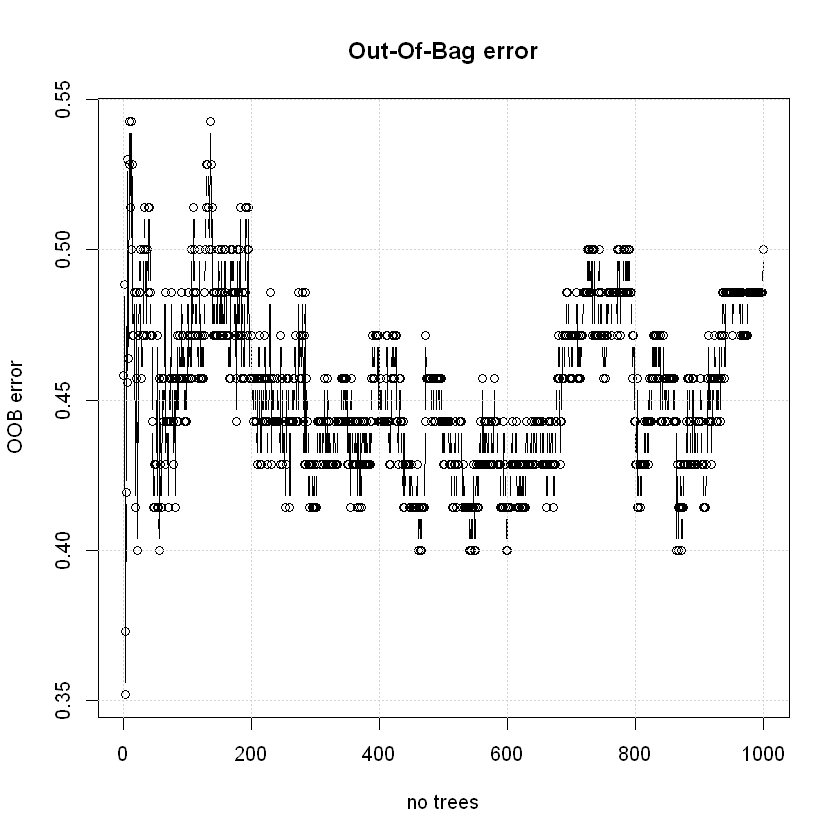

In [69]:
# OOB error
plot(rf_ind_med$err.rate[,1],type = "b",xlab = "no trees",ylab = "OOB error", main = 'Out-Of-Bag error')
grid()

It doesn't seem to make much sense to choose the size of the tree to optimize the tree, more when the best result is for 0 trees.

Let's see if we can see the polymorphisms that this particular model considers most important.

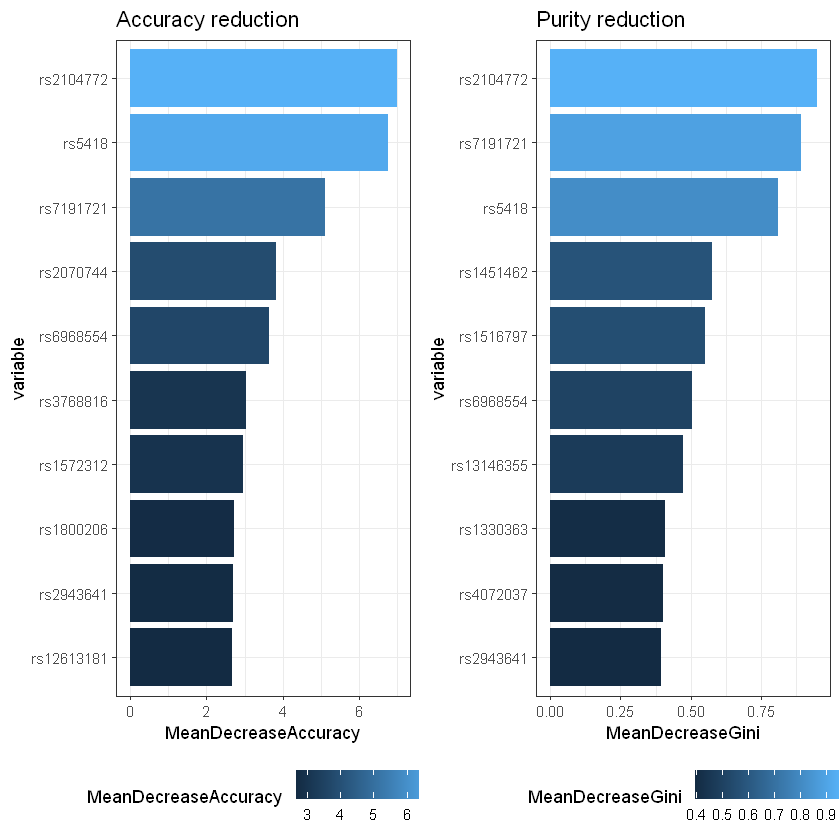

In [70]:
library(tidyverse)
library(ggpubr)
importancia_pred <- as.data.frame(importance(rf_ind_med, scale = TRUE))
importancia_pred <- rownames_to_column(importancia_pred, var = "variable")
p1 <- ggplot(data=importancia_pred[order(importancia_pred$MeanDecreaseAccuracy, decreasing = TRUE),][1:10,], aes(x=reorder(variable, MeanDecreaseAccuracy),
                                        y = MeanDecreaseAccuracy,
                                        fill = MeanDecreaseAccuracy)) +
    labs(x = "variable", title = "Accuracy reduction") +
    geom_col() +
    coord_flip() +
    theme_bw() +
    theme(legend.position = "bottom")

p2 <- ggplot(data = importancia_pred[order(importancia_pred$MeanDecreaseGini, decreasing = TRUE),][1:10,], aes(x = reorder(variable, MeanDecreaseGini),
                                          y = MeanDecreaseGini,
                                          fill = MeanDecreaseGini)) +
    labs(x = "variable", title = "Purity reduction") +
    geom_col() +
    coord_flip() +
    theme_bw() +
    theme(legend.position = "bottom")
ggarrange(p1, p2)



In [71]:
png(file ='random_forest_ind_med_FMM1.jpg')
library(tidyverse)
library(ggpubr)
importancia_pred <- as.data.frame(importance(rf_ind_med, scale = TRUE))
importancia_pred <- rownames_to_column(importancia_pred, var = "variable")
p1 <- ggplot(data=importancia_pred[order(importancia_pred$MeanDecreaseAccuracy, decreasing = TRUE),][1:10,], aes(x=reorder(variable, MeanDecreaseAccuracy),
                                        y = MeanDecreaseAccuracy,
                                        fill = MeanDecreaseAccuracy)) +
    labs(x = "variable", title = "Accuracy reduction") +
    geom_col() +
    coord_flip() +
    theme_bw() +
    theme(legend.position = "bottom")

p2 <- ggplot(data = importancia_pred[order(importancia_pred$MeanDecreaseGini, decreasing = TRUE),][1:10,], aes(x = reorder(variable, MeanDecreaseGini),
                                          y = MeanDecreaseGini,
                                          fill = MeanDecreaseGini)) +
    labs(x = "variable", title = "Purity reduction") +
    geom_col() +
    coord_flip() +
    theme_bw() +
    theme(legend.position = "bottom")
ggarrange(p1, p2)



dev.off()

png 
  2

We put together the snp considered most important based on the measures of MeanDecreaseAccuracy and MeanDecreaseGini.

* Variables with a high MeanDecreaseAccuracy

In [106]:
importancia_pred[order(importancia_pred$MeanDecreaseAccuracy, decreasing = TRUE),][1:10,]

,variable,0,1,MeanDecreaseAccuracy,MeanDecreaseGini
79,rs2104772,5.1198612,5.075941,6.987901,0.9478545
131,rs5418,5.0017854,4.601789,6.760097,0.8109001
152,rs7191721,4.3257403,4.118907,5.115731,0.8894336
77,rs2070744,2.8807988,3.428098,3.831234,0.3657689
148,rs6968554,1.8796622,3.532481,3.637035,0.5057815
109,rs3768816,2.0766940,2.110436,3.029232,0.3181474
42,rs1572312,1.9058803,2.526996,2.960207,0.2790826
54,rs1800206,2.6710955,1.557050,2.715746,0.2652731
99,rs2943641,1.5515563,2.002377,2.695226,0.3954027
30,rs12613181,0.1814488,3.786385,2.671753,0.2472000


In [104]:
top_MeanDecreaseAccuracy <- importancia_pred[order(importancia_pred$MeanDecreaseAccuracy, decreasing = TRUE),][1:10,]$variable

In [105]:
top_MeanDecreaseAccuracy

[1] "rs2104772"  "rs5418"     "rs7191721"  "rs2070744"  "rs6968554" 
 [6] "rs3768816"  "rs1572312"  "rs1800206"  "rs2943641"  "rs12613181"

'rs2070744' 'rs10999516' 'rs13146355' 'rs2542729' 'rs198851' 'rs17685' 'rs11144134' 'rs1589241' 'rs182549' 'rs7454108' 



* Variables with a high MeanDecreaseGini

In [112]:
importancia_pred[order(importancia_pred$MeanDecreaseGini, decreasing = TRUE),][1:10,]

,variable,0,1,MeanDecreaseAccuracy,MeanDecreaseGini
79,rs2104772,5.1198612,5.0759414,6.9879008,0.9478545
152,rs7191721,4.3257403,4.1189075,5.1157307,0.8894336
131,rs5418,5.0017854,4.6017887,6.7600967,0.8109001
38,rs1451462,1.8913968,1.6274102,2.1512268,0.5745322
40,rs1516797,0.4019288,0.9412837,0.9827035,0.5514410
148,rs6968554,1.8796622,3.5324806,3.6370347,0.5057815
32,rs13146355,1.1754025,1.6682185,2.0591693,0.4708856
33,rs1330363,-0.3591922,2.6755424,1.7785466,0.4071368
114,rs4072037,1.3287519,0.9519650,1.6725772,0.4000740
99,rs2943641,1.5515563,2.0023772,2.6952263,0.3954027


In [107]:
top_MeanDecreaseGini <- importancia_pred[order(importancia_pred$MeanDecreaseGini, decreasing = TRUE),][1:10,]$variable

In [108]:
top_MeanDecreaseGini

[1] "rs2104772"  "rs7191721"  "rs5418"     "rs1451462"  "rs1516797" 
 [6] "rs6968554"  "rs13146355" "rs1330363"  "rs4072037"  "rs2943641"

Common variables:

In [109]:
top_snp <- c()
for (i in top_MeanDecreaseAccuracy){
    for (j in top_MeanDecreaseGini){
        if (i == j){
            top_snp <- c(top_snp, i)
        }
    }
}
top_snp

[1] "rs2104772" "rs5418"    "rs7191721" "rs6968554" "rs2943641"

Although the algorithm has a bad precision, it can give us an idea that these polymorphisms can be interesting in the prediction. 